In [47]:

from sklearn.datasets import fetch_openml
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, log_loss



In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_heatmap(X_encoded):
  corr = X_encoded.corr()

  plt.figure(figsize=(12,10))
  sns.heatmap(corr, annot=False, cmap='coolwarm')
  plt.show()

In [24]:
census = fetch_openml('adult', version=2, as_frame=True)

census

{'data':        age     workclass  fnlwgt     education  education-num  \
 0       25       Private  226802          11th              7   
 1       38       Private   89814       HS-grad              9   
 2       28     Local-gov  336951    Assoc-acdm             12   
 3       44       Private  160323  Some-college             10   
 4       18           NaN  103497  Some-college             10   
 ...    ...           ...     ...           ...            ...   
 48837   27       Private  257302    Assoc-acdm             12   
 48838   40       Private  154374       HS-grad              9   
 48839   58       Private  151910       HS-grad              9   
 48840   22       Private  201490       HS-grad              9   
 48841   52  Self-emp-inc  287927       HS-grad              9   
 
            marital-status         occupation relationship   race     sex  \
 0           Never-married  Machine-op-inspct    Own-child  Black    Male   
 1      Married-civ-spouse    Farming-fishin

In [25]:
census.data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [26]:
census.target

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: class, Length: 48842, dtype: category
Categories (2, object): ['<=50K', '>50K']

In [27]:
census.data.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

dai dati che vedo posso fare le seguenti affermazioni:
- le seguenti colonne avranno bisogno di hotencoding:
  * workclass
  * education
  * marital-status
  * occupation
  * relationship
  * race
  * sex
  * native-country
- le seguenti classi andranno normalizzate:
  * capital-gain
  * capital-loss
  * hours-per-week
- per la seguente classe dovrò capire se rimuoverla o lasciarla ma ho bisogno di una heatmap:
  * fnlwgt
  * education-num


In [28]:
X = census.data
y = census.target

In [29]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [30]:
y

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: class, Length: 48842, dtype: category
Categories (2, object): ['<=50K', '>50K']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [32]:
print(f'X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}')

X_train: (39073, 14), X_test: (9769, 14), y_train: (39073,), y_test: (9769,)


inizio la pulizia di X

In [33]:
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
numerical_cols = ['capital-gain', 'capital-loss', 'hours-per-week']


In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(sparse_output=False), categorical_cols)
    ])

preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['capital-gain', 'capital-loss',
                                  'hours-per-week']),
                                ('cat', OneHotEncoder(sparse_output=False),
                                 ['workclass', 'education', 'marital-status',
                                  'occupation', 'relationship', 'race', 'sex',
                                  'native-country'])])

In [35]:
preprocessor.fit(X)

X_train_transformed = preprocessor.transform(X)

In [36]:
X_train_transformed

array([[-0.14480353, -0.2171271 , -0.03408696, ...,  0.        ,
         0.        ,  0.        ],
       [-0.14480353, -0.2171271 ,  0.77292975, ...,  0.        ,
         0.        ,  0.        ],
       [-0.14480353, -0.2171271 , -0.03408696, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.14480353, -0.2171271 , -0.03408696, ...,  0.        ,
         0.        ,  0.        ],
       [-0.14480353, -0.2171271 , -1.64812038, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.87131501, -0.2171271 , -0.03408696, ...,  0.        ,
         0.        ,  0.        ]], shape=(48842, 105))

In [37]:
X_train_df = pd.DataFrame(X_train_transformed)

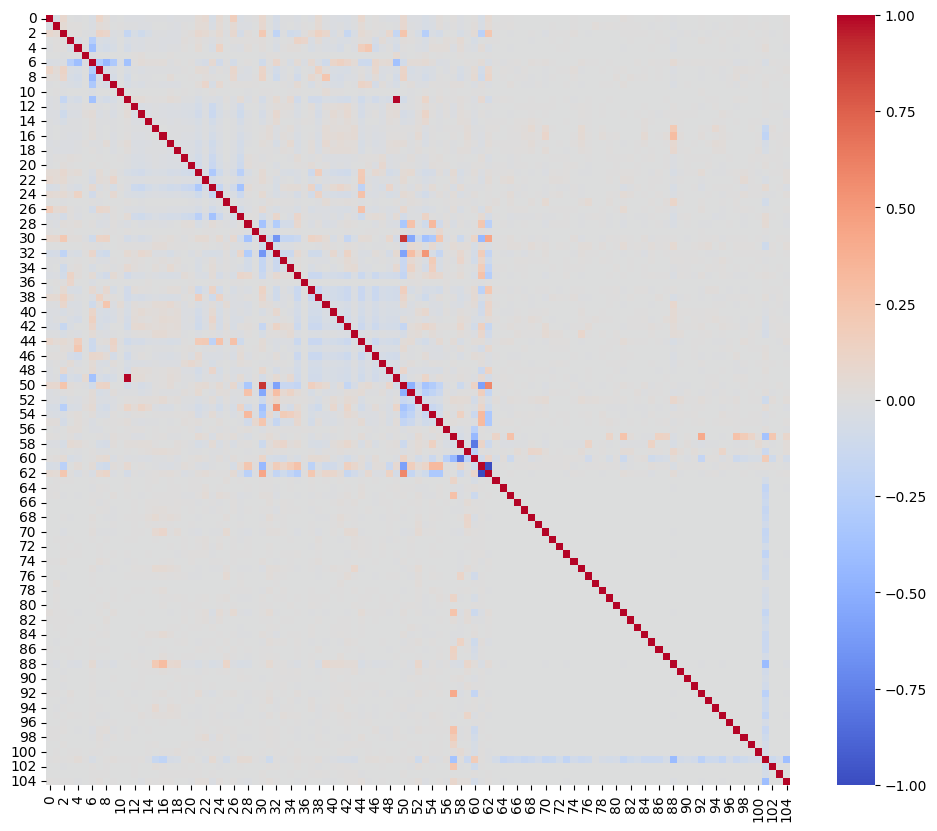

In [38]:
create_heatmap(X_train_df)

In [39]:
y

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: class, Length: 48842, dtype: category
Categories (2, object): ['<=50K', '>50K']

In [42]:
y = y.replace({"<=50K": 0, ">50K": 1})

y

C:\Users\David\AppData\Local\Temp\ipykernel_14420\1816109427.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({"<=50K": 0, ">50K": 1})
C:\Users\David\AppData\Local\Temp\ipykernel_14420\1816109427.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  y = y.replace({"<=50K": 0, ">50K": 1})


0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: class, Length: 48842, dtype: category
Categories (2, int64): [0, 1]

In [44]:
X_train_df

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,-0.144804,-0.217127,-0.034087,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.144804,-0.217127,0.772930,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.144804,-0.217127,-0.034087,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.886874,-0.217127,-0.034087,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.144804,-0.217127,-0.841104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.144804,-0.217127,-0.195490,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48838,-0.144804,-0.217127,-0.034087,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48839,-0.144804,-0.217127,-0.034087,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48840,-0.144804,-0.217127,-1.648120,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_train_df, y)

print(f'X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}')

X_train: (36631, 105), X_test: (12211, 105), y_train: (36631,), y_test: (12211,)


In [55]:
def mlpDefine(X_train, X_test, y_train, y_test, **kwargs):
  mlp = MLPClassifier(**kwargs)
  mlp.fit(X_train, y_train)
      
  y_pred_train = mlp.predict(X_train)
  y_prob_train = mlp.predict_proba(X_train)
      
  y_pred = mlp.predict(X_test)
  y_prob = mlp.predict_proba(X_test)
      
  accuracy_train = accuracy_score(y_train, y_pred_train)
  accuracy_test = accuracy_score(y_test, y_pred)

  loss_train = log_loss(y_train, y_prob_train)
  loss_test = log_loss(y_test, y_prob)
      
  print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
  print("LOG LOSS: TRAIN=%.4f TEST=%.4f" % (loss_train,loss_test))

In [58]:
alphas = [0.0001, 0.001, 0.01, 0.1, 1.0]
for alpha in alphas:
  print(f'alpha: {alpha}')
  mlpDefine(X_train, X_test, y_train, y_test, hidden_layer_sizes=(100, 100), alpha=alpha)

alpha: 0.0001


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ACCURACY: TRAIN=0.9068 TEST=0.8273
LOG LOSS: TRAIN=0.1956 TEST=0.6220
alpha: 0.001
ACCURACY: TRAIN=0.9048 TEST=0.8322
LOG LOSS: TRAIN=0.2010 TEST=0.5305
alpha: 0.01


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ACCURACY: TRAIN=0.9040 TEST=0.8359
LOG LOSS: TRAIN=0.2040 TEST=0.4850
alpha: 0.1
ACCURACY: TRAIN=0.8696 TEST=0.8541
LOG LOSS: TRAIN=0.2779 TEST=0.3246
alpha: 1.0
ACCURACY: TRAIN=0.8515 TEST=0.8545
LOG LOSS: TRAIN=0.3194 TEST=0.3194


In [59]:
mlpDefine(X_train, X_test, y_train, y_test, hidden_layer_sizes=(100, 100), alpha=10.0)

ACCURACY: TRAIN=0.8307 TEST=0.8328
LOG LOSS: TRAIN=0.3703 TEST=0.3707


tra le possibilità penso che una rete a 2 layer da 100 neuroni ciascuno con alpha = 1 sia un ottima soluzione per questo problema